In [1]:
!git clone https://github.com/AshishJangra27/Fake-News-Classification

!unzip /content/Fake-News-Classification/Fake.zip
!unzip /content/Fake-News-Classification/True.zip

!python -m spacy download en_core_web_lg

In [ ]:
import re
import nltk
import spacy
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_lg')

ps = PorterStemmer()
warnings.filterwarnings(action='ignore')

### 1. Loading the Dataset

In [28]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

true['fake'] = 0
fake['fake'] = 1

df = pd.DataFrame()
df = true.append(fake)

del true
del fake

df = df.drop(columns = ['date','subject','text'])
df = df.sample(frac = 1)

df.head()

titles = np.array(df['title'])

### 2. Data Preprocessing

In [35]:
corpus = []

for i in tqdm(range(len(titles))):
  news = re.sub(r'^a-zA-Z', '', titles[i])
  news = word_tokenize(news.lower())
  news = ' '.join([ps.stem(word) for word in news if not word in stopwords.words('english')])
  news = nlp(news).vector
  corpus.append(news)

X = np.array(corpus)

X_train = X[:40000]
y_train = df['fake'][:40000]
X_test  = X[40000:]
y_test  = df['fake'][40000:]

100%|██████████| 44898/44898 [10:20<00:00, 72.33it/s]


### 3. Training the Classifier

In [36]:
classifier = LogisticRegression(random_state = 1, max_iter = 50)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=50, random_state=1)

### 4. Model Evaluation

[[2138  130]
 [ 199 2431]]
Accuracy :  93.28


<Axes: >

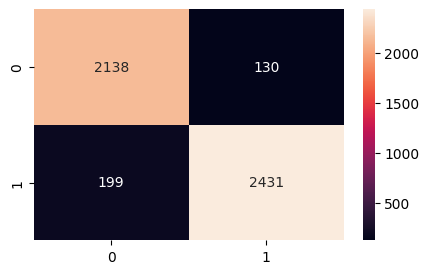

In [37]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy : ' , round(accuracy_score(y_test,y_pred)*100,2))

plt.figure(figsize = (5,3))
sns.heatmap(cm, annot = True, fmt = 'd')